## Business Case:-Prediction of Medical expenses

**Which Factors Influence the Price of Health Insurance?**
Many factors that affect how much you pay for health insurance are not within your control. Nonetheless, it's good to have an understanding of what they are. Here are some factors that affect how much health insurance premiums cost

-  age: age of primary beneficiary

-  sex: insurance contractor gender, female, male

-  bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

-  children: Number of children covered by health insurance / Number of dependents

-  smoker: Smoking

-  region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

#### We start our analysis by importing necessary modules.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')


Load the data into pandas dataframe

In [2]:
df= pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#### Examining the data

In [3]:
df.shape

(1338, 7)

Observations: There are 1338 observations and 7 columns.

#### Columns in dataframe

In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

#### Basic checks of data
Lets do some basic checks. Here I check a subset of data by the head method and check if there is any missing data using the info method. The columns are- age, sex, bmi, children, region, charges. 


In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


It seems we have no missing values in this dataset. 
Also, we have 3 object columns to encode further.

#### Next, let's check the statistics for the available data. 

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


It can be seen that primary beneficieries age runs from 18-64 years with BMI ranging from 15.9 to 53.13 and with 0 to 5 kids. The charges incurred range from  1121.87− 63770.

# Exploratory Data Analysis

The obvious question that comes to mind is- how are age and medical charges related. I check for it in the plot shown below. If sex can have any influence on the relationship is also checked. As can be observed, we see 3 prominent, parallel lines like pattern. In all of the three, one can see an increase in charges with increasing age.

Text(0.5, 1.0, 'Effect of Age on Charges')

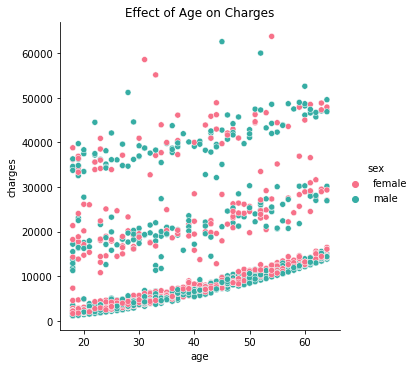

In [8]:
sns.relplot(x='age', y='charges', hue= 'sex', data=df, palette='husl')
plt.title('Effect of Age on Charges')


As, gender specific pattern is not clearly distinguishable in the plot above. I plot separately, for 'sex'. As above, similar pattern is observed.

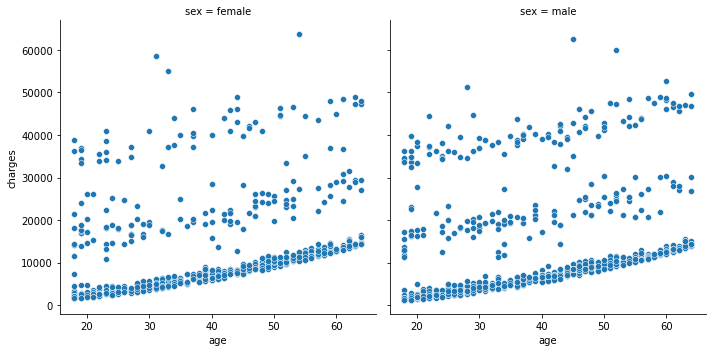

In [9]:
sns.relplot(x='age', y='charges', col='sex',data=df, palette='husl')


We later also included one of our obvious features- that can determine medical charges- 'Smoking'. As can be seen below that with increasing age, smokers show bigger increase in the medical charges compared to non-smokers. It seems that age and smoking are showing a synergistic relationship , as with increasing age, smokers show higher charges compared to non-smokers.

Text(0.5, 1.0, 'Combined effect of Age and Smoking on Charges')

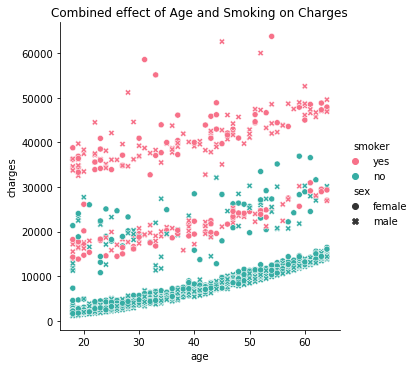

In [10]:
sns.relplot(x='age', y='charges', hue='smoker', style= 'sex', data=df, palette='husl')
plt.title('Combined effect of Age and Smoking on Charges')

Next, We try to check the relationship between charges and age as a function of smokers/non-smokers separately for the two genders. As can be seen from the lmplot below, there are lower charges for non-smokers compared to smokers with increasing age for both the genders.

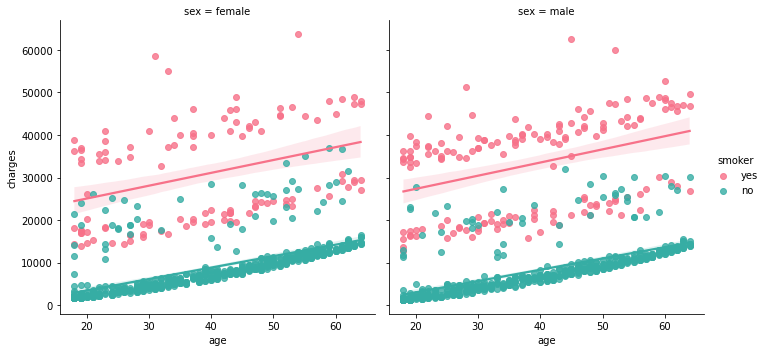

In [11]:
sns.lmplot(x='age', y='charges', hue='smoker', col='sex',data=df, palette='husl')

This relationship between smoker/non-smoker vs charges for both the genders become more clear from the violin plot shown below. With both the genders showing that for most of the non smokers the charges are below $20,000, while its higher for most of the smokers.

Text(0.5, 1.0, 'Effect of Smoking on Charges of males and females')

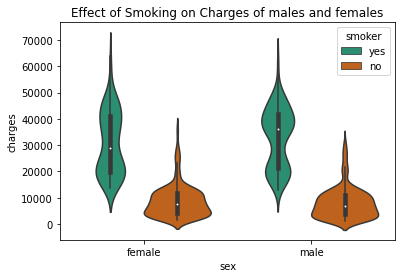

In [12]:
sns.violinplot(x="sex", y='charges', hue="smoker", data=df, palette='Dark2')
plt.title('Effect of Smoking on Charges of males and females')

Next, lets check if BMI has any influence on the medical charges. BMI as explained above is Body Mass Index. Higher BMI is correlated to higher body fat and thus, also correlated to metabolic diseases. BMI is thus a measure of body weight status. For adults, BMI below 18.5 is considered underweight, BMI of 18.5 – 24.9 is considered normal, BMI of 25.0 – 29.9 is considered overweight while BMI above 30 is considered obese. Therefore, I am interested to check if higher BMI can be correlated to higher medical charges.

Although, in the first scatterplot (shown below) the influence of BMI on charges is not clearly visible. But, BMI's influence on medical charges become clear when I involve 'smoker' feature (second scatterplot shown below). It shows that increasing BMI combined with smoking leads to higher charges compared to non-smoker with a higher BMI. This indicates, a probable synergistic relationship between smoking and BMI.

Text(0.5, 1.0, 'Effect of BMI on Charges')

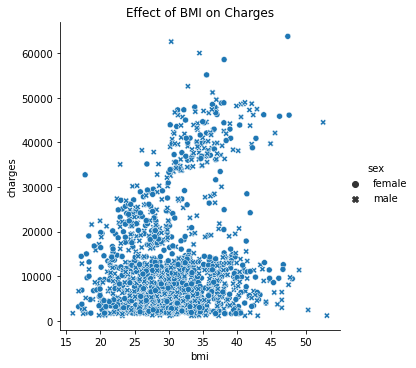

In [13]:
sns.relplot(x='bmi',y='charges',style='sex',data=df)
plt.title('Effect of BMI on Charges')

As indicated in the scatter plot below, obesity combined with smoking can lead to higher medical expenses.

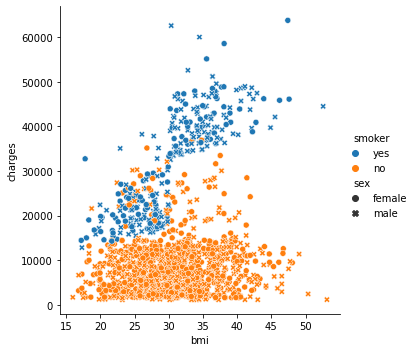

In [14]:
sns.relplot(x='bmi',y='charges',hue='smoker',style='sex',data=df)

Here, I check the combined influence of BMI and smoking on genders separately. Both males and females show similar influence of smoking and BMI. Smoking combined with an increasing BMI leads to increase in medical charges.

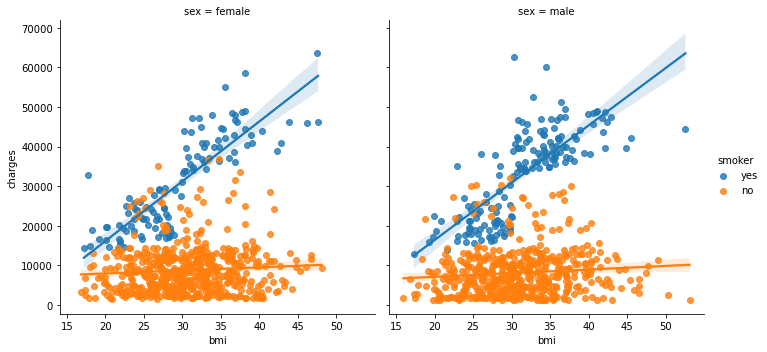

In [15]:
sns.lmplot(x='bmi',y='charges',hue='smoker', col='sex',data=df)

In order to find any correlation between the features, I check the paiplot (Shown below). One of the peculiar observations is that parents of 5 kids are incurring lesser medical expenses.

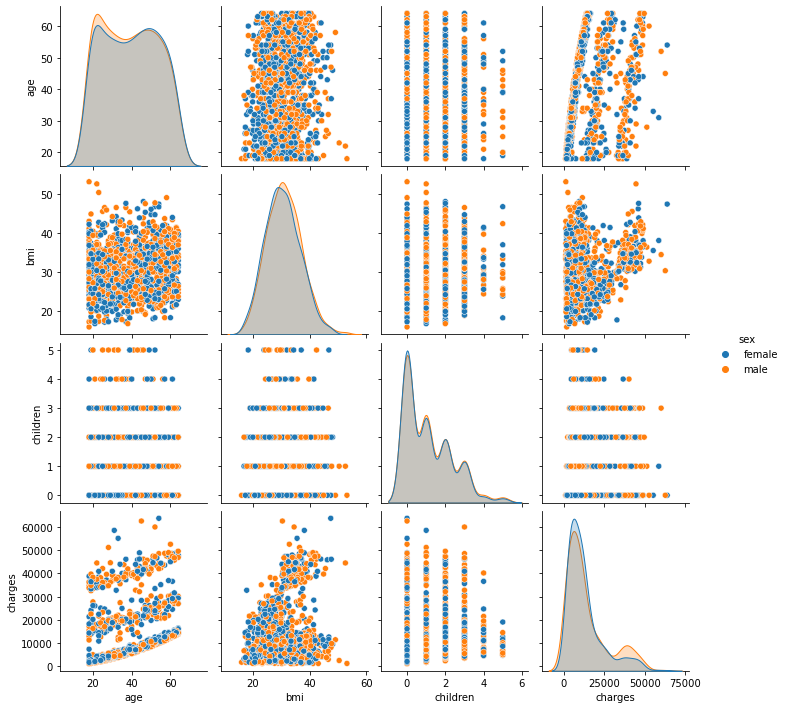

In [16]:
sns.pairplot(df, vars= ['age','bmi','children','charges'], hue='sex')

To dig deeper into the above mentioned observation, I check charges of fathers and mothers. As, observed in the previous plot moms and dads of 5 kids are indeed getting less medical billings as seen in the boxplot (shown below). They have less mean medical charges compared to the others.

Text(0.5, 1.0, 'Charges vs number of children')

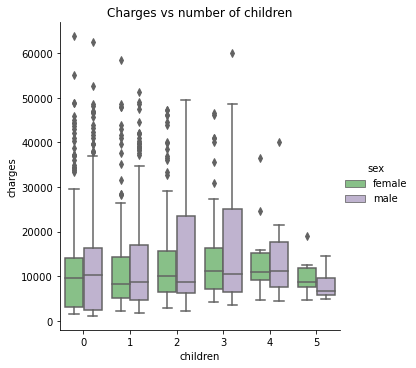

In [17]:
sns.catplot(x="children", y='charges', hue='sex', kind='box',data=df, palette= 'Accent')
plt.title('Charges vs number of children')

Also, as expected parents who smoke have more medical expenses, as seen in the boxplot below.

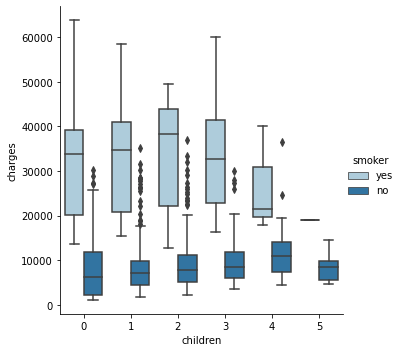

In [18]:
sns.catplot(x="children", y='charges', hue='smoker', kind='box',data=df , palette= 'Paired')

We check if Region has any influence on the charges. There are slightly more charges for people living in southeast region compared to the rest (as shown in the violoin plots below) .

<AxesSubplot:xlabel='region', ylabel='charges'>

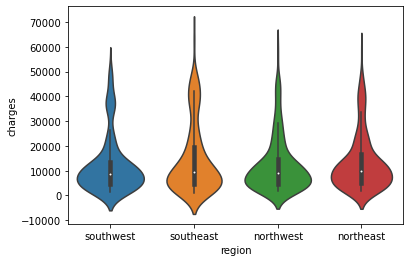

In [19]:
sns.violinplot(x="region", y='charges', data=df)

# Data Preprocessing

### Missing value detection and handling

In [20]:
## Checking missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

It has no missing values. Next we will check for any Outliers.

### Outlier handling

In [21]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


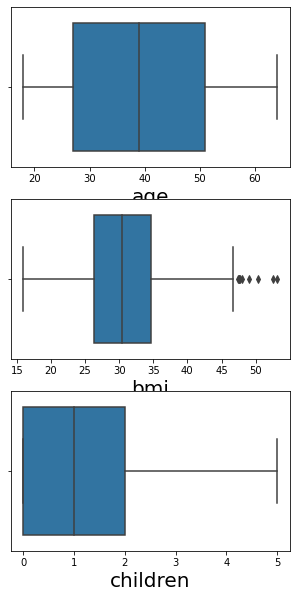

In [23]:
box=df[['age', 'bmi','children']]
plt.figure(figsize=(5,10), facecolor='white')#to sey canvas size
plotnumber = 1#counter

for column in box:#acc
    if plotnumber<=3 : # as there are 3 numerical columns in the data
        ax = plt.subplot(3,1,plotnumber)#plotting 3 graphs
        sns.boxplot(x=box[column])#boxplot to check for outlier
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
    plotnumber+=1#counter increment 


Before working on our model, we will need to do some data preprocessing. For that lets check which features are categorical. Looking at the dtypes of the features (as done below), we find that we have 3 out of 7 features that have 'object' dtype. These are - sex, smoker and region. If we want to use them for predictive modelling then these need to be encoded . For features that have just two values like in case of smoker and sex, we use Label Encoder and for region we use one hot encoding .One hot encoding is better than label encoding when we have more than two values for any categorical feature. Below, you can see that I have encoded these 3 variables and checked the results.

In [24]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [25]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(df['sex'].drop_duplicates())
df['sex']=encoder.transform(df['sex'])
encoder.fit(df['smoker'].drop_duplicates())
df['smoker']=encoder.transform(df['smoker'])
df1=pd.get_dummies(df['region'], prefix='region')
df= pd.concat([df,df1], axis=1).drop(['region'],axis=1)

In [26]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


# Scaling

In [28]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [31]:
df.loc[:,['age','bmi','charges']]=sc.fit_transform(df.loc[:,['age','bmi','charges']])

In [32]:
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,0,-0.453320,0,1,0.298584,0,0,0,1
1,-1.509965,1,0.509621,1,0,-0.953689,0,0,1,0
2,-0.797954,1,0.383307,3,0,-0.728675,0,0,1,0
3,-0.441948,1,-1.305531,0,0,0.719843,0,1,0,0
4,-0.513149,1,-0.292556,0,0,-0.776802,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,1,0.050297,3,0,-0.220551,0,1,0,0
1334,-1.509965,0,0.206139,0,0,-0.914002,1,0,0,0
1335,-1.509965,0,1.014878,0,0,-0.961596,0,0,1,0
1336,-1.296362,0,-0.797813,0,0,-0.930362,0,0,0,1


# Feature Selection

<AxesSubplot:>

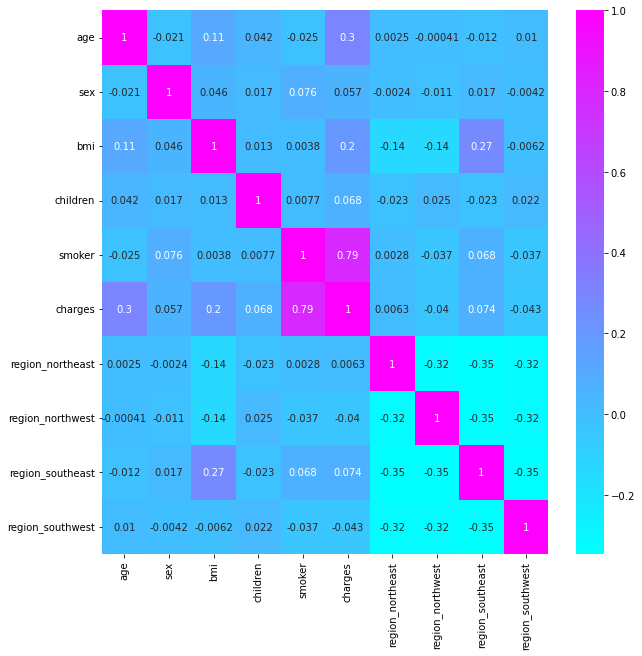

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='cool')

# Linear Regression

## Model building

In [38]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression## Model import
from sklearn.metrics import r2_score

## Definig independent and dependent variables
X = df.drop(['charges'], axis = 1)
y = df['charges']

## Definiging training and testing data, on training data, model will be created.Now to evaluate the 
## model,testing data is required.However on production you will have unseen data
X_train, X_test, y_train, y_test = holdout(X, y, test_size=0.2, random_state=42)


In [39]:
Lin_reg = LinearRegression()
Lin_reg.fit(X_train, y_train)

LinearRegression()

In [40]:
print(Lin_reg.intercept_)
print(Lin_reg.coef_)

-0.43365225288141956
[ 2.98141630e-01 -1.53580725e-03  1.69748264e-01  3.51310819e-02
  1.95375310e+00  3.79650419e-02  7.34443256e-03 -1.63792738e-02
 -2.89302007e-02]


In [44]:
## Model Evaluation
##prediciton on training data
y_train_predict=Lin_reg.predict(X_train)
from sklearn.metrics import r2_score
train_score=r2_score(y_train,y_train_predict)
train_score

0.7417255854683333

In [47]:
X_train.shape

(1070, 9)

In [48]:
## CHecking adjusted r2 score
train_adjusted_r2 = 1-(1-0.74)*(1070-1)/(1070-9-1)
train_adjusted_r2

0.7377924528301887

In [46]:
## Model Evaluation
##prediciton on test data
y_test_predict=Lin_reg.predict(X_test)
from sklearn.metrics import r2_score
test_score=r2_score(y_test,y_test_predict)
test_score

0.7835929767120724

In [49]:
X_test.shape


(268, 9)

In [50]:
## CHecking adjusted r2 score
test_adjusted_r2 = 1-(1-0.78)*(268-1)/(268-9-1)
test_adjusted_r2

0.7723255813953489